In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [3]:

df = pd.read_csv('new_training set.csv')

In [4]:
df[df.sentences.apply(type) == str]

,Unnamed: 0,source,jim_crow,section_text,sentences
0,0,murray,1,Subject only to restrictions and conditions no...,Subject only to restrictions and conditions no...
1,1,murray,1,Powers and duties of Commission. The said Text...,Powers and duties of Commission.
2,2,murray,1,Powers and duties of Commission. The said Text...,The said Textbook Purchase and Rental Commissi...
3,3,murray,1,Powers and duties of Commission. The said Text...,"Acquire by contract, and/or purchase, such tex..."
4,4,murray,1,Powers and duties of Commission. The said Text...,"and instructional supplies, which are, or may ..."
...,...,...,...,...,...
8681,4107,murray book,1,Wyoming Compiled Statutes 1945 (Annotated) Ali...,"All marriages of white persons with Negroes, M..."
8682,4108,murray book,1,Wyoming Compiled Statutes 1945 (Annotated) Ali...,Penalty for violation.
8683,4109,murray book,1,Wyoming Compiled Statutes 1945 (Annotated) Ali...,Whosoever shall knowingly contract marriagein ...
8684,4110,murray book,1,Wyoming Compiled Statutes 1945 (Annotated) Ali...,Foreign Marriages.


In [5]:
type(df['sentences'])

pandas.core.series.Series

In [6]:
#Use TF-IDF to extract features and vectorize sentences after word segmentation.
#import nltk package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
TF_Vec=TfidfVectorizer(max_df=0.8,
                       min_df = 3,
                       stop_words=frozenset(stop_words)
                      )

[nltk_data] Downloading package stopwords to /Users/karen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
vectors = TF_Vec.fit_transform(df['sentences'])

In [8]:
print(vectors.shape)

(8686, 5371)


In [9]:
print(vectors.nnz)

161733


In [10]:
print(vectors.nnz / float(vectors.shape[0])/5371)

0.0034667591061453376


In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [12]:

#reduced = TruncatedSVD(n_components=50).fit_transform(vectors)
reduced = PCA(n_components=5).fit_transform(vectors.todense())


/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [16]:
vectors.todense().shape

(8686, 5371)

In [14]:
reduced

array([[ 0.01427233, -0.05439446, -0.0191887 , -0.02039747,  0.02857139],
       [ 0.02874595, -0.09339503, -0.01247686, -0.12511616,  0.01057122],
       [ 0.00668961,  0.0478197 , -0.0303012 , -0.07613028,  0.04895184],
       ...,
       [-0.04652158,  0.00752938,  0.38265924,  0.20193201, -0.19790377],
       [ 0.04328633, -0.08798645, -0.03009284,  0.00381217,  0.03160349],
       [ 0.10412505, -0.01248585, -0.03105444, -0.02580811, -0.04364986]])

In [11]:
embedded = TSNE(n_components=2, perplexity=30).fit_transform(reduced)

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
import warnings
warnings.filterwarnings('ignore')
embedded2 = TSNE(n_components=3, perplexity=30).fit_transform(reduced)

/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
print(embedded)

[[-17.843761   17.13184  ]
 [ 45.192528   13.240815 ]
 [ 49.755806  -17.839386 ]
 ...
 [ 43.302834  -57.557907 ]
 [-18.151335  -51.897614 ]
 [-30.53104     3.1121204]]


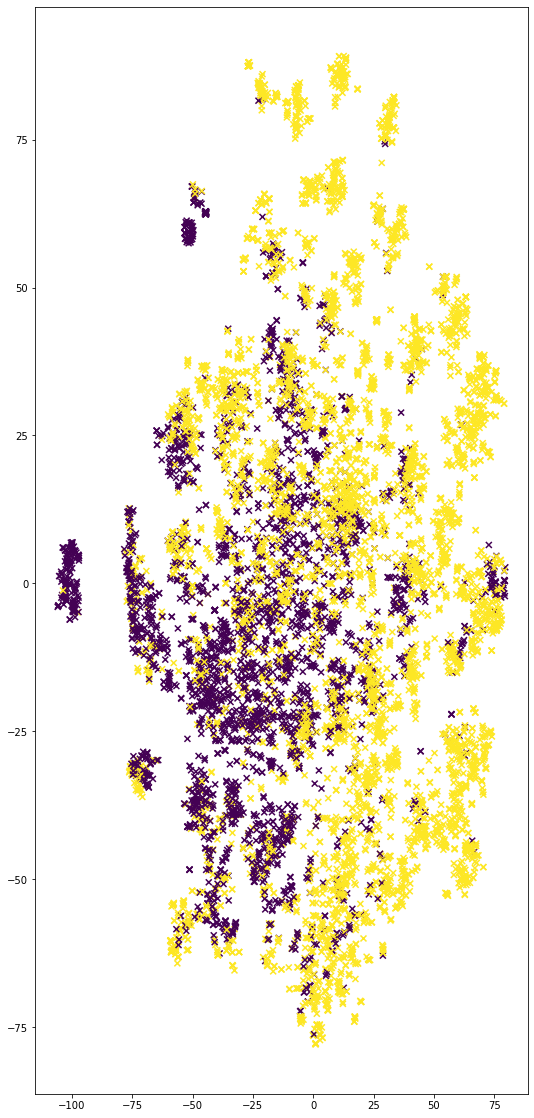

In [ ]:

fig = plt.figure(figsize=(30, 20))

plt.subplot(131)
plt.scatter(embedded[:, 0], embedded[:, 1],c=df['jim_crow'], marker="x");


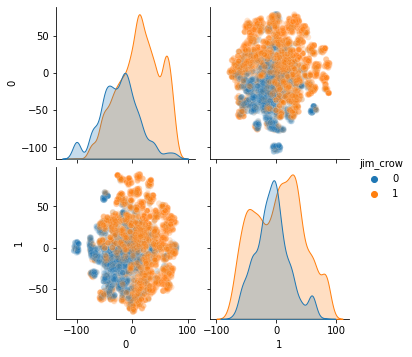

In [ ]:
import seaborn as sns
sns.pairplot(pd.concat([pd.DataFrame(embedded),df["jim_crow"]], axis=1), kind = 'scatter',hue = 'jim_crow', plot_kws={'alpha': 0.1})

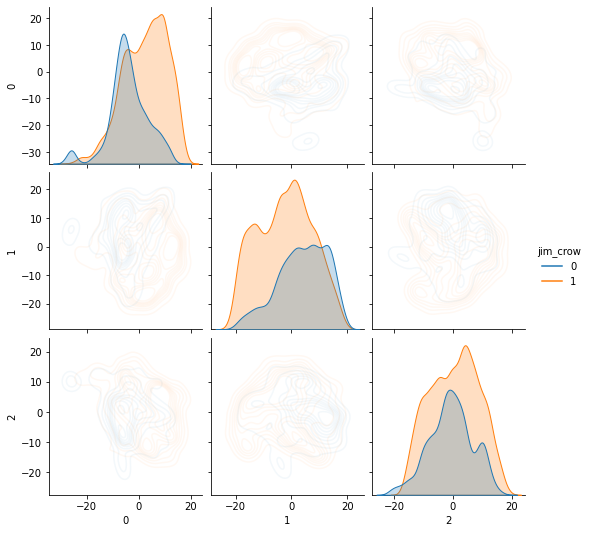

In [55]:

sns.pairplot(pd.concat([pd.DataFrame(embedded2),df["jim_crow"]], axis=1), diag_kws=dict(common_norm=True),
diag_kind = 'kde',kind = 'kde',
hue = 'jim_crow', plot_kws={'alpha': 0.05})

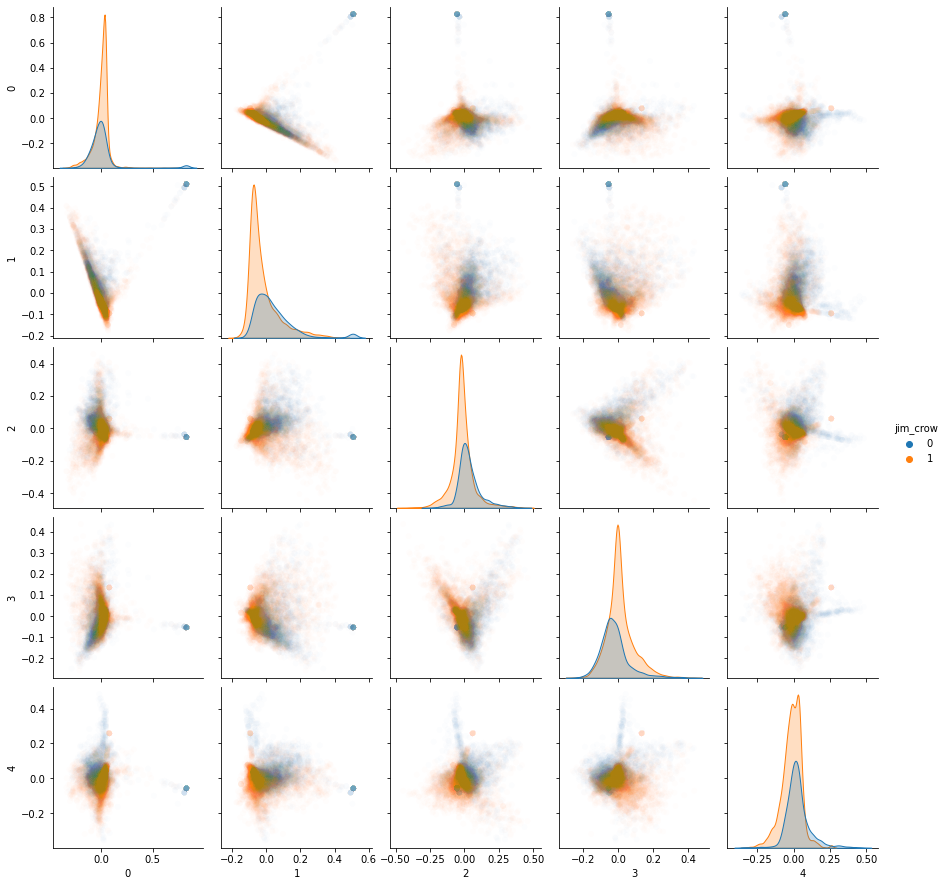

In [44]:

sns.pairplot(pd.concat([pd.DataFrame(reduced),df["jim_crow"]], axis=1), kind = 'scatter',hue = 'jim_crow', plot_kws={'alpha': 0.01})

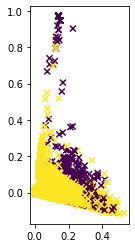

In [ ]:

reduced_with_TruncatedSVD = TruncatedSVD(n_components=2).fit_transform(vectors)
plt.subplot(132)
plt.scatter(reduced_with_TruncatedSVD[:, 0], reduced_with_TruncatedSVD[:, 1],c=df['jim_crow'], marker="x")


/Users/karen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


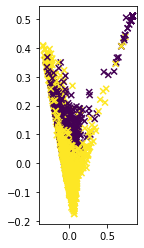

In [ ]:

reduced_with_PCA = PCA(n_components=2).fit_transform(vectors.todense())
plt.subplot(133)
plt.scatter(reduced_with_PCA[:, 0], reduced_with_PCA[:, 1],\
c=df['jim_crow'], marker="x")

### word2vec + t-sne

In [12]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

def clean_sentence(val):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in sentence:
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

data = df['sentences'].apply(clean_sentence)

In [92]:
data[0]

'subject restrictions conditions existing hereafter imposed federal statutes regulations treaties contracts agreements conveyances such indians federal government the several members the eastern band cherokee indians residing cherokee graham swain jackson adjoining counties north carolina the lineal descendants bona fide member such eastern band cherokee indians shall inherit purchase otherwise lawfully acquire hold use encumber convey alienate will deed any lawful means any property whatsoever fully completely all respects any other citizen the state north carolina authorized to inherit hold dispose such property'

In [70]:
df['sentences'][0]

'Subject only to restrictions and conditions now existing or hereafter imposed under Federal statutes and regulations, or treaties, contracts, agreements, or conveyances between such Indians and the Federal Government, the several members of the Eastern Band of Cherokee Indians residing in Cherokee, Graham, Swain, Jackson and other adjoining counties in North Carolina, and the lineal descendants of any bona fide member of such Eastern Band of Cherokee Indians, shall inherit, purchase, or otherwise lawfully acquire, hold, use, encumber, convey and alienate by will, deed, or any other lawful means, any property whatsoever as fully and completely in all respects as any other citizen of the State of North Carolina is authorized to inherit, hold, or dispose of such property.'

In [93]:

def build_corpus(d):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in d:
        word_list = col.split(" ")
        corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)  

In [78]:
len(corpus)

8686

In [94]:
lst = corpus
dict = {}
for i in lst:
    for key in i:
        dict[key] = dict.get(key, 0) + 1


In [98]:
a = sorted(dict.items(), key=lambda x: x[1], reverse=True)
print(a[0:10])

[('the', 20311), ('shall', 8339), ('said', 4755), ('any', 2932), ('may', 2403), ('', 2320), ('board', 2316), ('a', 2287), ('county', 2250), ('such', 2174)]


In [104]:
freq = [*dict.values()]

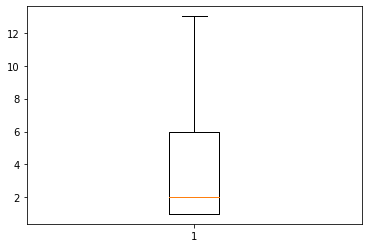

In [113]:
plt.boxplot(freq,showfliers=False);

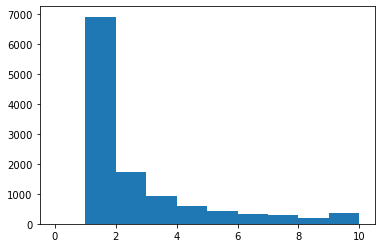

In [128]:
plt.hist(freq, bins = 10, range = (0,10));

In [139]:
def find_percentage(lst,num):
    count = 0
    for i in lst:
        if i >= num:
            count += 1
    return (count, round(count/len(lst),4))

In [142]:
find_percentage(freq,500)

(845, 0.0584)

In [129]:
model = word2vec.Word2Vec(corpus, vector_size=50, window=2, min_count=2, workers=4)
model.wv['property']
#model.wv.index_to_key

array([ 0.8633031 ,  1.815162  ,  0.56190675, -1.0013908 ,  1.1126783 ,
        0.41146004,  0.8944763 ,  1.2535956 , -0.64119345, -0.3368918 ,
        0.22162744, -1.1335669 ,  0.09565804,  0.8862603 , -0.5745987 ,
        0.53615725,  1.1390903 , -1.7488186 ,  0.1381697 , -1.2968178 ,
        0.01818934,  0.29752982,  1.037663  , -0.7079386 ,  0.4804698 ,
        1.1166837 , -0.32477775,  0.30483237, -0.54445755,  0.6267508 ,
        1.2785985 ,  0.33876193, -0.23291722,  0.03025448, -0.38018915,
        0.70911676, -0.29237586,  0.56665015,  0.43651074,  0.34923023,
        0.7057127 , -1.5488219 ,  0.09472958,  0.46766552,  1.4130118 ,
       -1.216755  ,  0.03547269, -1.1126347 ,  0.16616373,  0.1283432 ],
      dtype=float32)

In [150]:

import warnings
warnings.filterwarnings('ignore')
def tsne_plot(m):
    labels = []
    tokens = []

    for word in m.wv.index_to_key:
        tokens.append(m.wv[word])
        labels.append(word)

    X_tsne = TSNE(n_components=2).fit_transform(tokens)#n_components=2

# tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
# new_values = tsne_model.fit_transform(tokens)
    words = m.wv.index_to_key
    for word in words:
        list.append(word)

    plt.figure(figsize=(30, 15)) 


    plt.scatter(X_tsne[:,0],X_tsne[:,1])
    for i in range(len(X_tsne)):
        x=X_tsne[i][0]
        y=X_tsne[i][1]
        plt.text(x , y,list[i],size = 16)
    
    plt.show()


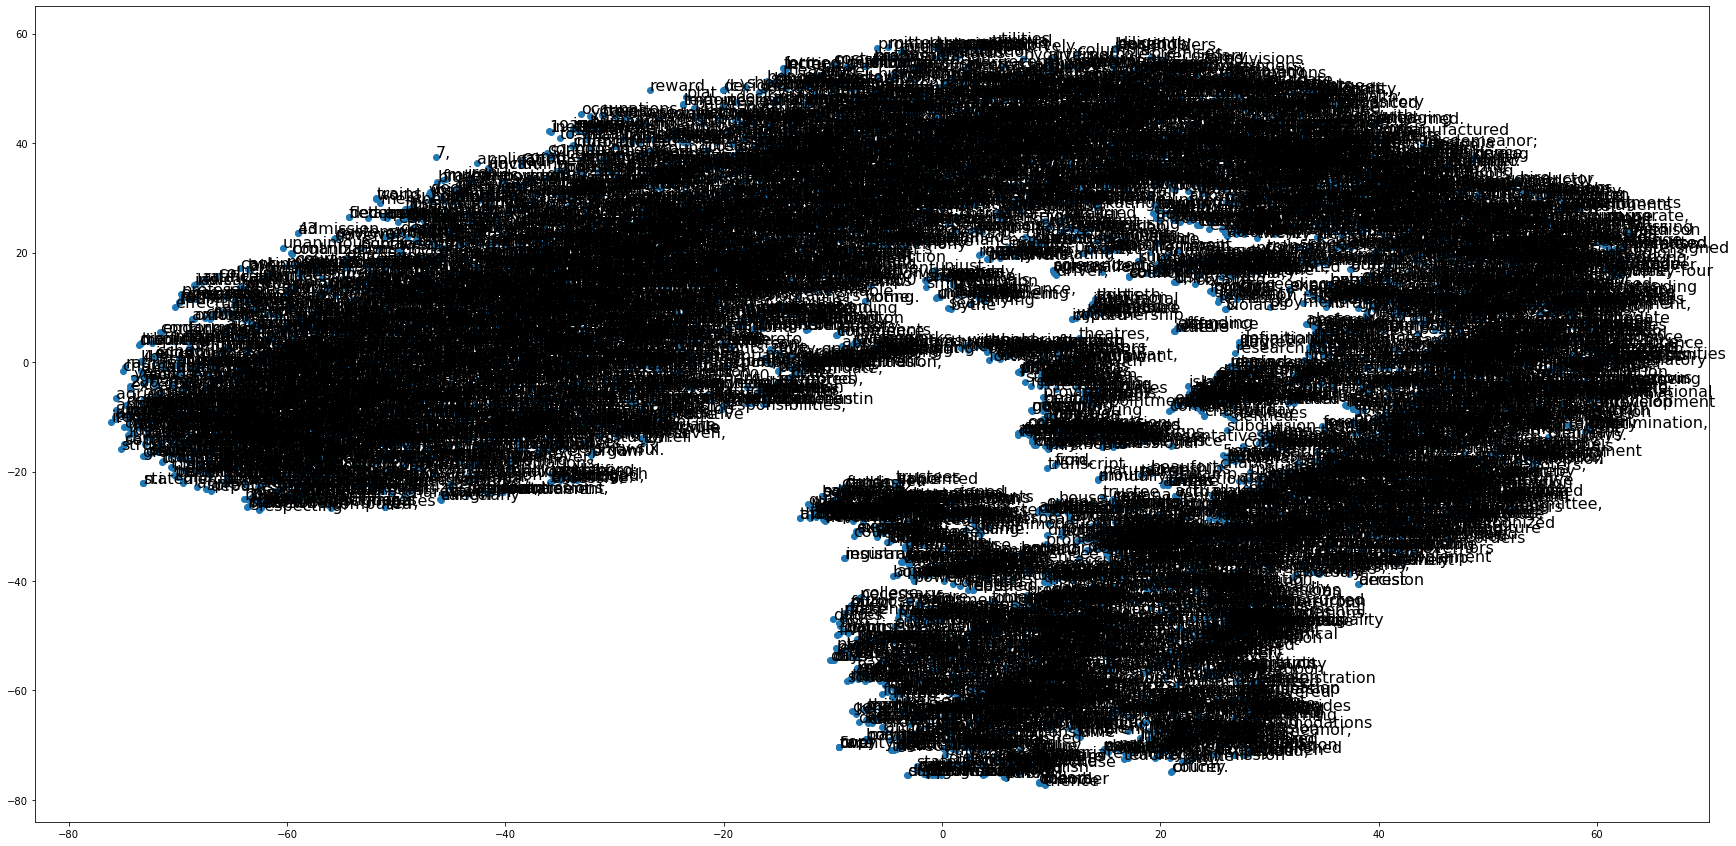

In [146]:
tsne_plot(model)

In [60]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,50), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


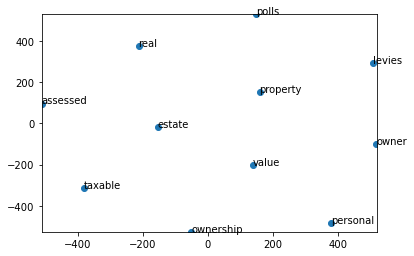

In [144]:
warnings.filterwarnings('ignore')
display_closestwords_tsnescatterplot(model, 'property')

In [ ]:
plot_only = 100	
low_dim_embs = TSNE(n_components=2).fit_transform(tokens[:plot_only])

labels2 = [model.wv.index_to_key[i] for i in range(plot_only)] 

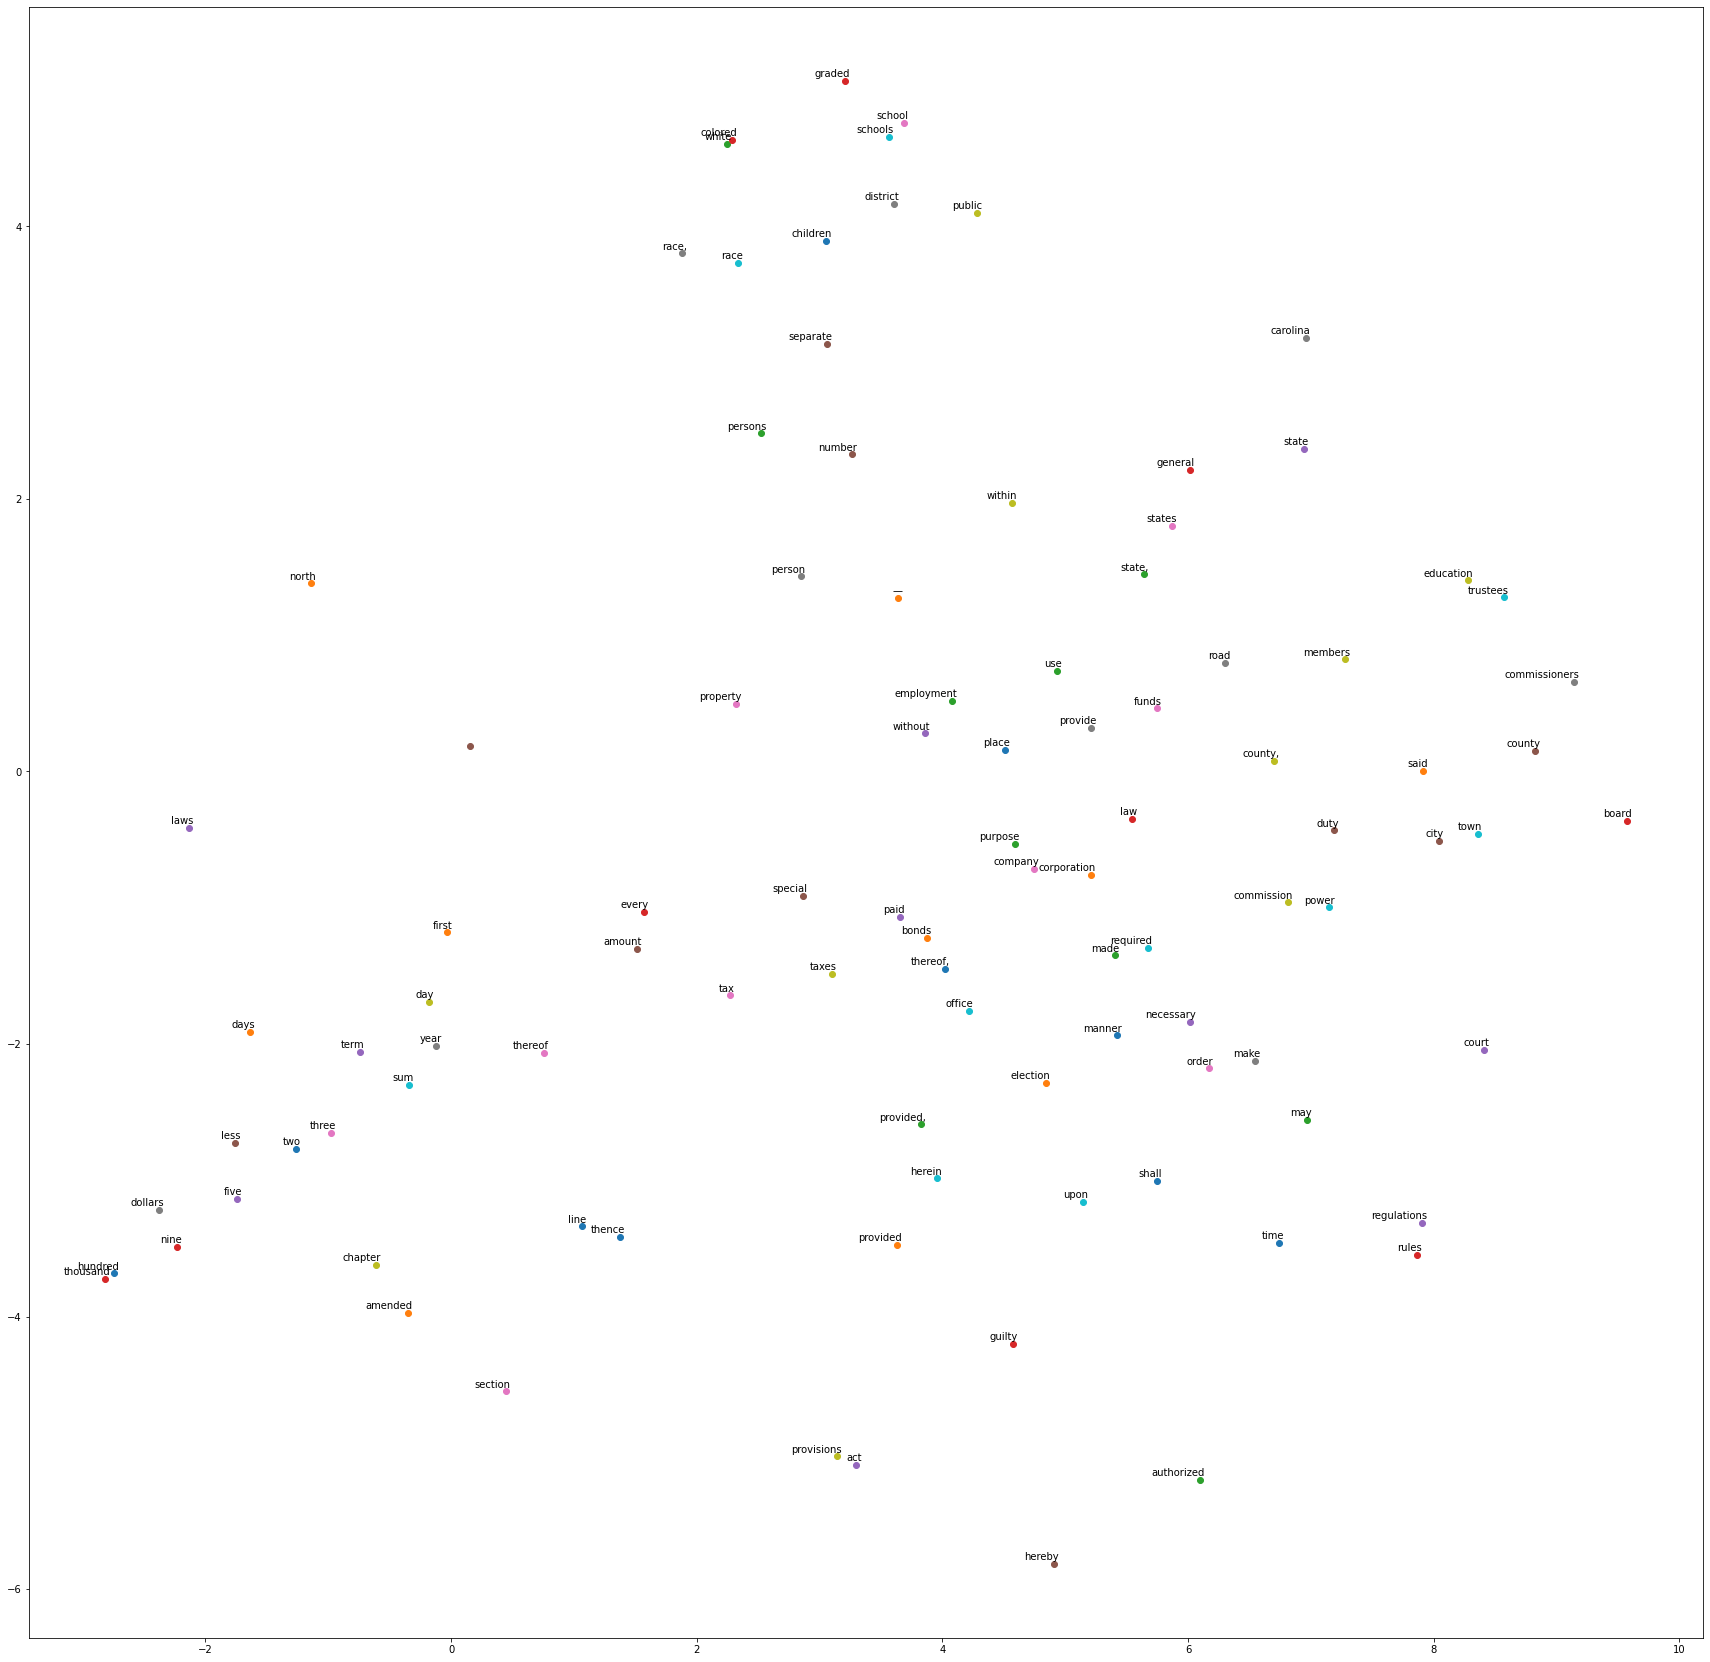

In [67]:
def plot_with_labels(low_dim_embs, labls):   
    assert low_dim_embs.shape[0] >= len(labls), 'More labels than embeddings'

    plt.figure(figsize=(30, 30))  # in inches
    for i, label in enumerate(labls):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)	
        plt.annotate(label,	
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.show()

plot_with_labels(low_dim_embs, labels2)



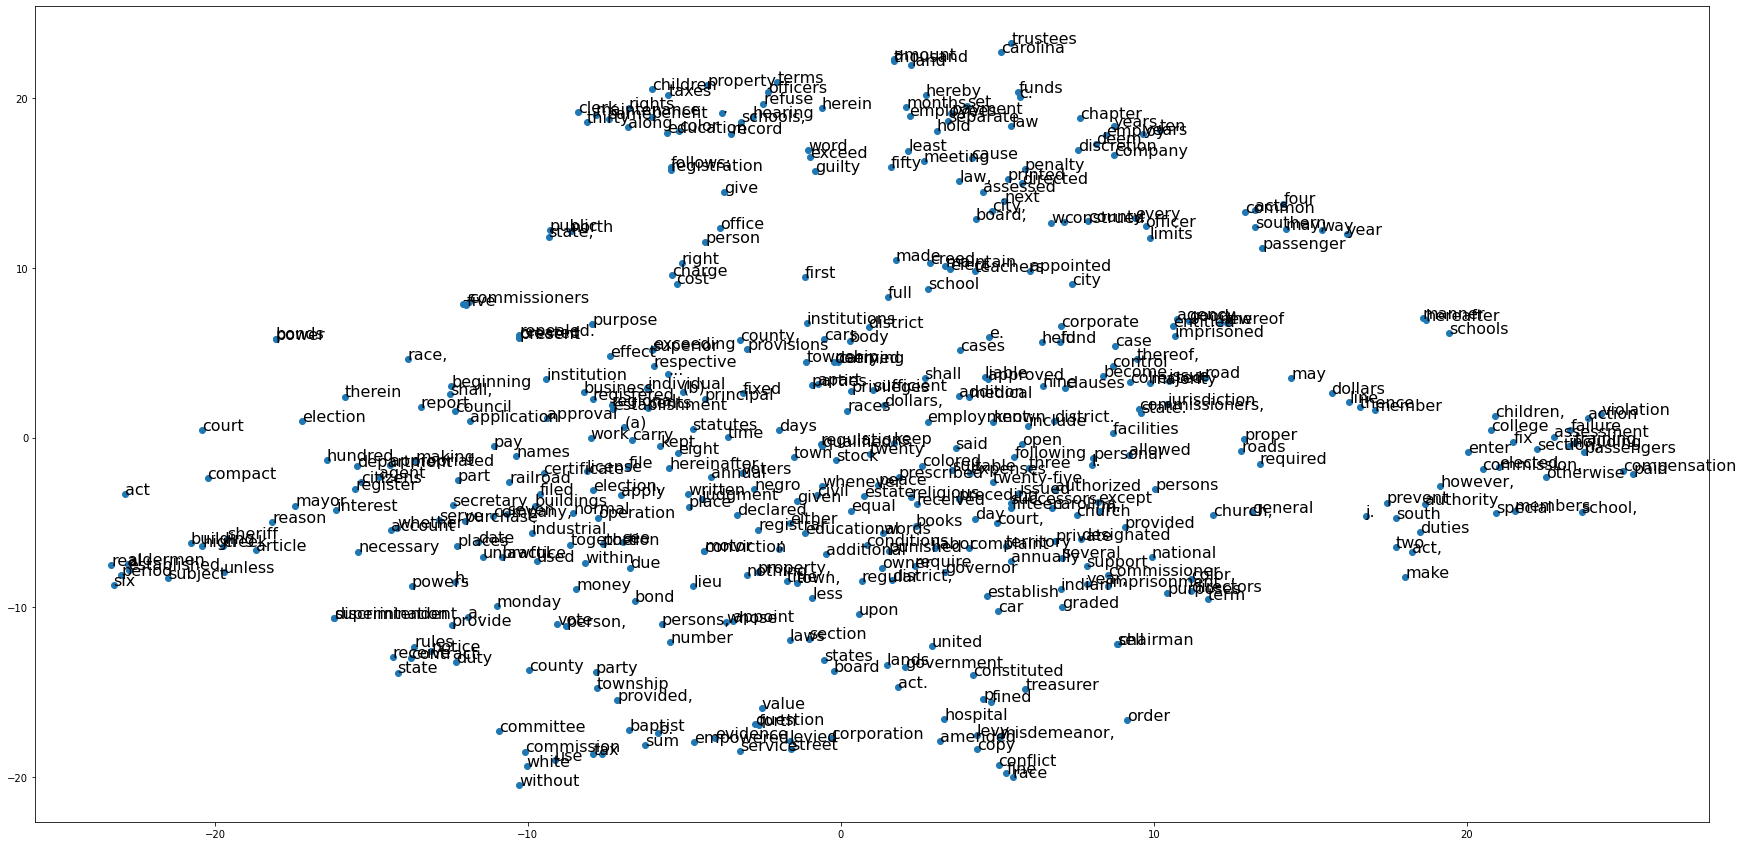

In [152]:
# A more selective model
warnings.filterwarnings('ignore')
model2 = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=100)
tsne_plot(model2)
